In [10]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, abs

In [2]:
a = 1 #lattice constant
# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
e0 = 0 
lattice = pb.Lattice(a1=a1, a2=a2)
lattice.add_sublattices(
    ('A', np.array([0, 0]), e0), ('B', np.array([a*sqrt(3)/2, a/2])/sqrt(3), e0), ('C', np.array([a*sqrt(3)/2, -a/2])/sqrt(3), e0))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = 1

lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, 0], 'A', 'B', t),
    ([-1, -1], 'A', 'B', t),
    ([0, 0], 'A', 'C', t),
    ([0, 1], 'A', 'C', t),
    ([-1, 0], 'A', 'C', t),
)

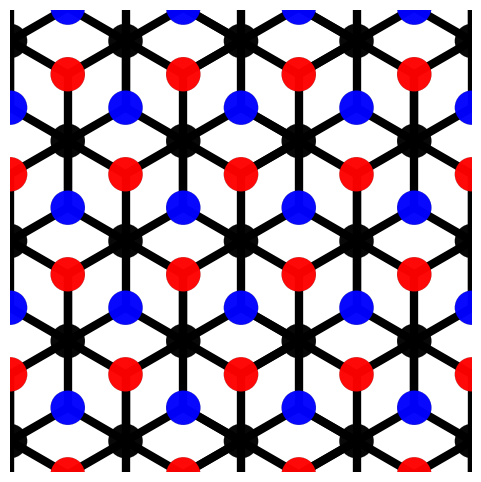

In [3]:
plt.figure(figsize=(6, 6))
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [4]:
G = np.linalg.norm(lattice.reciprocal_vectors()[1])

In [7]:
to_k1_k2 = np.array([[1, 0], [-1/2, sqrt(3)/2]])

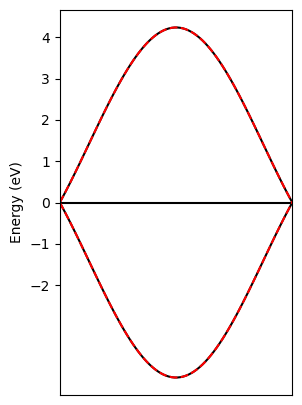

In [25]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(model)
K = np.array([G/sqrt(3), 0])
bands = solver.calc_bands(-K, K)
k_path = bands.k_path
k1, k2 = np.einsum("ij, kj->ik", to_k1_k2, k_path)
nearest_neighbor_sum = 3 + 2*np.cos(k1) + 2*np.cos(k2) +  2*np.cos(k1+k2)
analytic_bands_positive = sqrt(2 * nearest_neighbor_sum)
alternative_analytic = sqrt(2) * abs(1+2*np.cos([k[0]/2 for k in k_path]))
energies = bands.energy

plt.plot(energies, color="black")
plt.plot(analytic_bands_positive, color="red", linestyle="dashed")
plt.plot(-alternative_analytic, color="red", linestyle="dashed")


plt.xlim(0, len(k_path)-1)
#plt.ylim(-2, 4)
plt.yticks(np.linspace(-2, 4, num=7));
plt.xticks([]);
plt.ylabel("Energy (eV)");